# Sagar Kumar 210968002
# DSE B Batch 1
# Week 2 - ANN

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import itertools as it

In [25]:
df = pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [28]:
df.duplicated().any()

False

In [29]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [30]:
df = pd.get_dummies(df, dtype=np.int32)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [31]:
df['Balance'] = df['Balance'].mask(df['Balance'] == 0).fillna(df['Balance'].mean())
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,76485.889288,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.860000,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,76485.889288,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,76485.889288,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.610000,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,76485.889288,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.310000,2,1,0,92888.52,1,0,1,0,0,1


In [32]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = StandardScaler().fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [33]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [34]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,0,1,0,0,1


In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1034,0.129037,0.674932,-0.695982,-0.869761,0.807737,0,1,1.324796,1,0,0,0,1
7994,-1.360899,-1.708908,-1.387538,1.494948,2.527057,1,1,1.218072,0,1,0,1,0
516,-1.888585,1.628468,1.724464,-0.869761,2.527057,0,1,-0.657884,1,0,0,1,0
44,0.097996,2.105236,-0.004426,1.627925,-0.911583,1,1,1.012877,0,0,1,1,0
1406,-0.812520,-1.518201,-1.041760,0.714380,-0.911583,0,1,-0.574709,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.305528,0.770285,0.687130,0.100997,-0.911583,1,1,-0.578897,0,1,0,0,1
7813,0.346319,2.295943,-0.695982,-0.720114,-0.911583,1,0,-0.529442,0,1,0,1,0
905,0.222158,0.579578,1.378686,-0.869761,-0.911583,1,1,-0.140200,1,0,0,1,0
5192,0.129037,0.007457,1.032908,-0.869761,0.807737,1,1,0.018757,1,0,0,1,0


In [37]:
dims = X_train.shape[1]
dims

13

In [38]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [39]:
models = list(it.repeat([
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(2, activation='sigmoid', input_shape=(dims,)),
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(2, activation='sigmoid', input_shape=(dims,)),
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(32, activation='relu', input_shape=(dims,)),
        Dense(2, activation='sigmoid', input_shape=(dims,)),
    ]),
], 9))
models

[[<keras.src.engine.sequential.Sequential at 0x7fdbef93e090>,

In [40]:
batch_size = 32
epochs = [10, 20, 30]
learning_rate = [0.1, 0.01, 0.001]

In [41]:
for i in models:
    for j in range(len(i)):
        i[j].compile(optimizer=Adam(learning_rate=learning_rate[j]), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
trains = [
    i[j].fit(X_train, y_train, epochs=epochs[j], batch_size=batch_size, validation_split=0.15) for j in range(len(i)) for i in models
]

Epoch 1/10
226/226 [==============================] - 2s 7ms/step - loss: 0.4539 - accuracy: 0.8113 - val_loss: 0.3982 - val_accuracy: 0.8267
Epoch 2/10
226/226 [==============================] - 2s 7ms/step - loss: 0.4027 - accuracy: 0.8230 - val_loss: 0.4008 - val_accuracy: 0.8047
Epoch 3/10
226/226 [==============================] - 2s 8ms/step - loss: 0.4011 - accuracy: 0.8339 - val_loss: 0.4112 - val_accuracy: 0.8173
Epoch 4/10
226/226 [==============================] - 1s 6ms/step - loss: 0.3982 - accuracy: 0.8352 - val_loss: 0.3917 - val_accuracy: 0.8361
Epoch 5/10
226/226 [==============================] - 1s 6ms/step - loss: 0.4049 - accuracy: 0.8221 - val_loss: 0.3894 - val_accuracy: 0.8227
Epoch 6/10
226/226 [==============================] - 1s 6ms/step - loss: 0.4012 - accuracy: 0.8203 - val_loss: 0.3855 - val_accuracy: 0.8282
Epoch 7/10
226/226 [==============================] - 1s 6ms/step - loss: 0.4049 - accuracy: 0.8192 - val_loss: 0.4038 - val_accuracy: 0.8188
Epoch 

In [43]:
tlosses = [i.history['loss'] for i in trains]
tlosses

[[0.453905314207077,
  0.4026927053928375,
  0.40113499760627747,
  0.39823320508003235,
  0.404890239238739,
  0.40118974447250366,
  0.4049350321292877,
  0.40402448177337646,
  0.40578922629356384,
  0.397312194108963],
 [0.40687239170074463,
  0.39649197459220886,
  0.408091276884079,
  0.4142369031906128,
  0.40089210867881775,
  0.40276840329170227,
  0.4139341413974762,
  0.4108348786830902,
  0.402651846408844,
  0.39914876222610474],
 [0.3966790437698364,
  0.40038421750068665,
  0.39946940541267395,
  0.3969675600528717,
  0.407662570476532,
  0.4134402573108673,
  0.395839661359787,
  0.39787498116493225,
  0.41190364956855774,
  0.4019557237625122],
 [0.4233241081237793,
  0.3969593048095703,
  0.39623013138771057,
  0.39825552701950073,
  0.40789008140563965,
  0.4016995429992676,
  0.4031609892845154,
  0.4055664837360382,
  0.3970211148262024,
  0.40154242515563965],
 [0.3992598056793213,
  0.4033096432685852,
  0.4024379849433899,
  0.40860581398010254,
  0.406046837568

In [44]:
vlosses = [i.history['val_loss'] for i in trains]
vlosses

[[0.3982076346874237,
  0.40081727504730225,
  0.41121336817741394,
  0.3917284309864044,
  0.38938772678375244,
  0.38547149300575256,
  0.40381285548210144,
  0.4099835455417633,
  0.38683176040649414,
  0.39821743965148926],
 [0.3850395083427429,
  0.38035011291503906,
  0.39937055110931396,
  0.3864609897136688,
  0.38956138491630554,
  0.4253588318824768,
  0.3863869309425354,
  0.40347230434417725,
  0.39578044414520264,
  0.3785805106163025],
 [0.3784027397632599,
  0.38215839862823486,
  0.3790999948978424,
  0.4705467224121094,
  0.45745429396629333,
  0.4464014172554016,
  0.38156020641326904,
  0.3884035646915436,
  0.4012596607208252,
  0.40708649158477783],
 [0.39750802516937256,
  0.4173961281776428,
  0.3847876787185669,
  0.40574270486831665,
  0.39170995354652405,
  0.38635820150375366,
  0.37755271792411804,
  0.38802585005760193,
  0.4026453495025635,
  0.3858693540096283],
 [0.39216041564941406,
  0.4080503284931183,
  0.39335641264915466,
  0.4016819894313812,
  0.

TypeError: can only concatenate list (not "int") to list

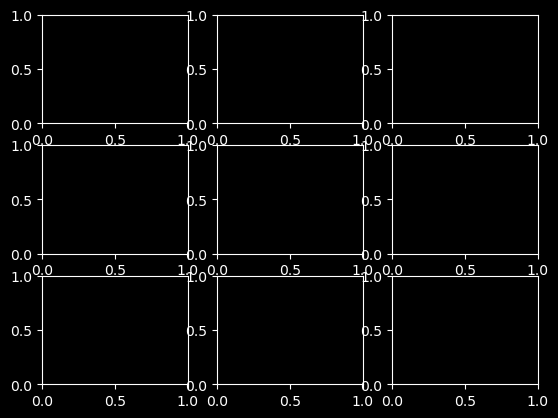

In [48]:
epoch_index = 0
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[i + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[i + j + k])

        

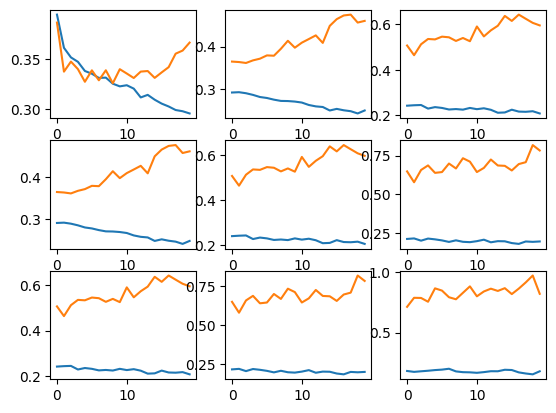

In [ ]:
epoch_index = 1
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[9 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[9 + j + k])
        

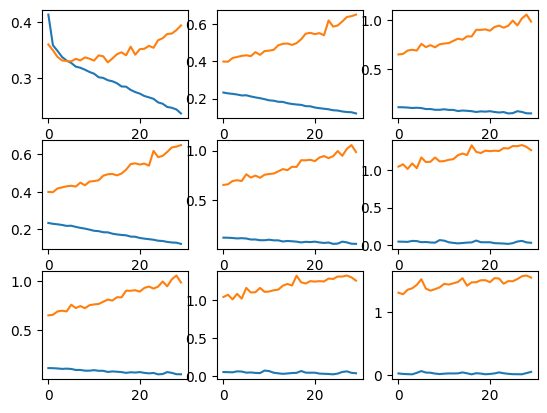

In [ ]:
epoch_index = 2
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[18 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[18 + j + k])
        

### Evaluation

In [ ]:
z=1
for i in range(9):
  for model in models[i]:
    loss, accuracy = model.evaluate(X_test,y_test)
    print("model : {} --> loss : {} , accuracy : {}".format(z,loss,accuracy))
    z+=1